# Regression - Übungen

In [1]:
%pylab inline
%config InlineBackend.figure_format = 'svg'
from scipy.optimize import linprog

Populating the interactive namespace from numpy and matplotlib


## Aufgaben

### Aufgabe R1: Polynomiale Regression

Laden Sie mit folgenden Python-Befehlen die Daten der Datei `Polyfit.csv` in ein array `D`, dessen Spalten als Daten-Vektoren $t$ und $y$ weiterverwendet werden: 
```python
D = genfromtxt('Polyfit.csv', delimiter=';')
t = D[:,0]
y = D[:,1]
```

1. Plotten Sie $y$ gegen $t$.
2. Verwenden Sie die Methode der kleinsten Fehlerquadrate (Reggression, Python-Befehl `lstsq`), um ein Polynom vom Grad 4 durch die Punktwolke zu fitten. Erzeugen Sie ein Stamm-Blatt-Diagramm der Koeffizienten. Warum sind die ungeraden Koeffizienten null?
3. Plotten Sie die ursprünglichen Datenpunkte und den polynomialen Fit in eine Grafik.
4. Benutzen Sie die Befehle `polyfit` und `poly1d` um die gleichen Resultate zu erzielen.

### Aufgabe R2: Mooresches Gesetz

Mehr Information zum Beispiel unter [https://de.wikipedia.org/wiki/Mooresches_Gesetz](https://de.wikipedia.org/wiki/Mooresches_Gesetz).

1. Die Datei `Moores_Law.csv` enthält die Anzahlen $n$ der Transistoren in 13 Mikroprozessoren und die Jahre derer Einführung $t$ als Spalten. Laden Sie die Datein mit den folgenden Python-Befehlen
```python
D = genfromtxt('Moores_Law.csv', delimiter=';')
t = D[:,0]
n = D[:,1]
```
und plotten Sie $n$ gegen $t$ mit den Befehlen `plot` und `semilogy`.
2. Erklären Sie, wie die Methode der kleinsten Fehlerquadrate (Reggression) verwendet werden kann, um $\alpha$ und  $t_0$ zu bestimmen, so dass

   $$n_i \approx \alpha^{t_i -t_0} \text{ for } i= 1, . . . , 13$$

   gilt.
3. Lösen Sie das Least-Squares-Problem (d.h. die Reggressionsaufgabe) in Python mit dem Befehl `lstsq`. Vergleichen Sie Ihre Resultate mit dem Mooreschen Gesetz, das behauptet, dass sich die Anzahl der Transistoren in Mikroprozessoren alle 2 Jahre verdoppelt.

### Aufgabe R3: Muellmengen

Die Müllmenge in Millionen Tonnen pro Tag des Landes Lower Slobbovia
von 1960 bis 1995 ist in folgender Tabelle wiedergegeben.

|Jahr $t$  |  1960 | 1965 | 1970  | 1975  | 1980  | 1985  | 1990  | 1995  |
|----------|-------|------|-------|-------|-------|-------|-------|-------|
|Menge $y$ |  86.0 | 99.8 | 135.8 | 155.0 | 192.6 | 243.1 | 316.3 | 469.5 |

1. Formulieren Sie das OLS-Problem in Matrixform für den besten Fit einer Gerade durch die Datenpunkte.
2. Formulieren Sie das OLS-Problem in Matrixform für den besten Fit eines exponentiellen Wachstumsmodells $y=ce^{\alpha t}$ durch die Datenpunkte.
3. Plotten Sie die Daten, und begründen Sie, welches Modell (linear oder exponentiell) besser geeignet ist.
4. Lösen Sie beide OLS-Problem und stellen Sie die Ergebnisse grafisch dar.

### Aufgabe R4: Globale Erwärmung

Laden Sie die Datei `Global_Temperatures.csv` in Python mit dem Befehl:

```python
D = genfromtxt('Global_Temperatures.csv', delimiter=';')
```

Die [Werte](https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.csv) stammen von der NASA-Homepage [GISS Surface Temperature Analysis](https://data.giss.nasa.gov/gistemp/graphs/). Sie repräsentieren jährliche Mittel der Abweichungen der Oberflächentemperaturen vom Mittel der Jahre 1951 bis 1980. Die erste Spalte enthält die Jahre, die zweite die jährlichen Mittelwerte, die dritte die 5-jährlichen Mittelwerte.

1. Fitten Sie mittels der Methode der kleinsten Fehlerquadrate (Reggression) mindestens zwei sinnvolle Funktionen durch die jährlichen Mittelwerte. Stellen Sie Ihre Ergebnisse auch grafisch dar.
2. Benutzen Sie Ihre mindestens zwei Modelle, um die jährliche mittlere Temperaturabweichung für die nächsten 30 Jahre vorherzusagen. Stellen Sie Ihre Ergebnisse auch grafisch dar.

## Lösungen

### Lösung R1: Polynomiale Regression

Laden der Daten, Berechnung und Darstellung der Regressionskoeffizienten:

Koeffizient der Ordnung 0 =   0.661640
Koeffizient der Ordnung 1 =  -0.000000
Koeffizient der Ordnung 2 =  -0.087919
Koeffizient der Ordnung 3 =   0.000000
Koeffizient der Ordnung 4 =   0.002735


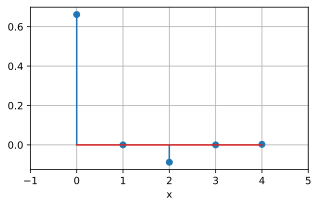

In [2]:
D = genfromtxt('daten/Polyfit.csv', delimiter=';')
t = D[:,0]
y = D[:,1]
n = len(t)

A = column_stack( (ones((n, 1)), t, t**2, t**3, t**4) )
x = lstsq(A, y, rcond=None)[0]

for k in range(len(x)):
    print("Koeffizient der Ordnung {:d} = {:10.6f}".format(k, x[k]))

figure(figsize=(5,3))
stem(x, use_line_collection=True)
xlabel('x')
xlim(-1, 5)
grid(True)

Plot des polynomialen Fits:

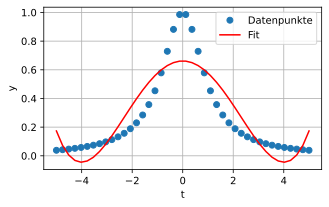

In [3]:
y_fit = A@x

figure(figsize=(5,3))
plot(t, y, 'o', label='Datenpunkte')
plot(t, y_fit, '-r', label='Fit')
xlabel('t')
ylabel('y')
legend(numpoints = 1)
grid(True)

Befehle `polyfit` und `poly1d`:

Koeffizient der Ordnung 4 =   0.002735
Koeffizient der Ordnung 3 =   0.000000
Koeffizient der Ordnung 2 =  -0.087919
Koeffizient der Ordnung 1 =  -0.000000
Koeffizient der Ordnung 0 =   0.661640


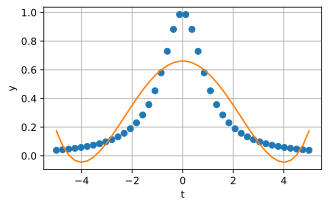

In [4]:
ordnung = 4
c = polyfit(t, y, ordnung)

for k in range(ordnung + 1):
    print("Koeffizient der Ordnung {:d} = {:10.6f}".format(ordnung - k, c[k]))

figure(figsize=(5,3))
plot(t, y, 'o')
plot(t, poly1d(c)(t) )
xlabel('t')
ylabel('y')
grid(True)

### Lösung R2: Mooresches Gesetz

In [5]:
D = genfromtxt('daten/Moores_Law.csv', delimiter=';')
t = D[:,0]
n = D[:,1]

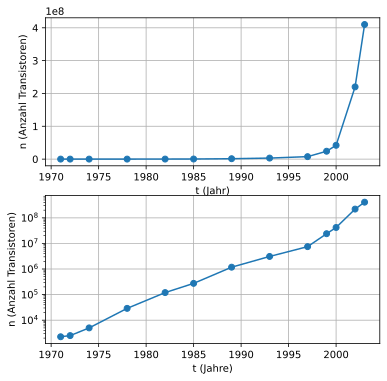

In [6]:
figure(figsize=(6,6))

subplot(211)
plot(t, n, 'o-')
xlabel("t (Jahr)")
ylabel("n (Anzahl Transistoren)")
grid(True)

subplot(212)
semilogy(t,n,'o-')
xlabel("t (Jahre)")
ylabel("n (Anzahl Transistoren)")
grid(True)

$$\begin{align}
n_i       & = \alpha^{(t_i - t_0)} | \log() \\
\log(n_i) & = (t_i - t_0)\log(\alpha) \\
\log(n_i) & = -t_0\log(\alpha) + \log(\alpha)t_i
\end{align}$$

In [7]:
b = log(n)
m = len(b)
A = column_stack((ones((m, 1)), t))
x = lstsq(A, b, rcond=None)[0]

alpha = exp(x[1])
t0 = -x[0]/x[1]
n_fit= alpha**(t - t0)

print("t0 = ", t0)
print("alpha^2 = ", alpha**2)

t0 =  1949.7063396217359
alpha^2 =  2.0325271695788367


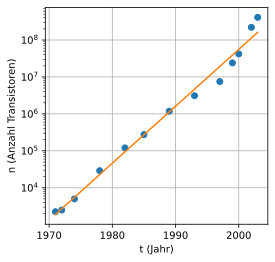

In [8]:
figure(figsize=(4,4))
semilogy(t, n, 'o')
semilogy(t, n_fit, '-');
xlabel("t (Jahr)")
ylabel("n (Anzahl Transistoren)")
grid(True)

### Lösung R3: Muellmengen

1. Minimiere $\sum_{t=1960}^{1995} (y_t - (kt + d))^2$ in Matrixform: 

    $$\text{min. }\lVert\begin{pmatrix}
     1960 & 1 \\
     1965 & 1 \\
     \vdots & \vdots \\
     1995 & 1 
    \end{pmatrix}
    \begin{pmatrix} k \\ d \end{pmatrix} -
    \begin{pmatrix} 86.0 \\ 99.8 \\ \vdots \\ 469.5 \end{pmatrix}
    \rVert$$

2. Logarithmieren von $y=ce^{\alpha t}$ liefert $\ln(y) =  \alpha t + \ln(c)$.

    $$\text{min. }\lVert\begin{pmatrix}
     1960 & 1 \\
     1965 & 1 \\
     \vdots & \vdots \\
     1995 & 1 
    \end{pmatrix}
    \begin{pmatrix} \alpha \\ \ln(c) \end{pmatrix} -
    \begin{pmatrix} \ln(86.0) \\ \ln(99.8) \\ \vdots \\ \ln(469.5) \end{pmatrix}
    \rVert$$

3. Siehe Code -> exponentielles Modell

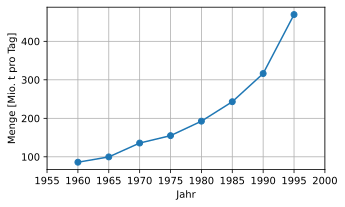

In [10]:
t = arange(1960, 2000, 5)
y = array([86.0, 99.8, 135.8, 155.0, 192.6, 243.1, 316.3, 469.5])

figure(figsize=(5,3))
plot(t, y, 'o-')
xlim(1955, 2000)
xlabel('Jahr')
ylabel('Menge [Mio. t pro Tag]')
grid(True)

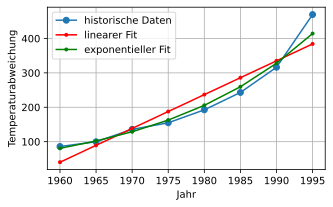

In [11]:
# linear, d. h. Gerade:
n = len(t) 
A = column_stack( (ones((n,1)),t) )
x_linear = lstsq(A, y, rcond=None)[0]
y_fit_linear = dot(A, x_linear)

# exponentiell:
A = column_stack( (ones((n,1)),t) )
x_exp = lstsq(A, log(y), rcond=None)[0]
y_fit_exp = exp(dot(A, x_exp))

figure(figsize=(5, 3))
plot(t, y, 'o-', label='historische Daten')
plot(t, y_fit_linear, '.-r', label='linearer Fit')
plot(t, y_fit_exp   , '.-g', label='exponentieller Fit')
xlabel('Jahr')
ylabel('Temperaturabweichung')
legend(loc='best', numpoints=1)
grid(True)

### Lösung R4: Globale Erwärmung

In [12]:
D = genfromtxt('daten/Global_Temperatures.csv', delimiter=';')
t = D[:,0]
T = D[:,1]
n = len(t)

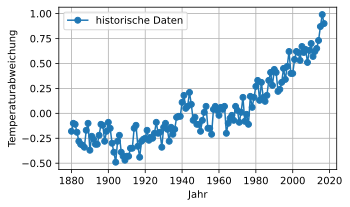

In [13]:
figure(figsize=(5,3))
plot(t, T, 'o-', label='historische Daten')
xlabel('Jahr')
ylabel('Temperaturabweichung')
legend(numpoints=1, loc='best')
grid(True)

Linearer (Gerade) und quadratischer Fit via Least-Squares:

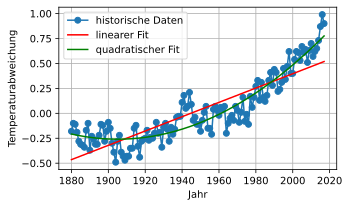

In [14]:
# linear, d. h. Gerade:

A = column_stack( (ones((n,1)),t) )
x_linear = lstsq(A, T, rcond=None)[0]
y_fit_linear = A@x_linear

# quadratisch:
A = column_stack( (ones((n,1)),t,t**2) )
x_quadr = lstsq(A, T, rcond=None)[0]
y_fit_quadr = A@x_quadr

figure(figsize=(5,3))
plot(t, T, 'o-', label='historische Daten')
plot(t, y_fit_linear, '-r', label='linearer Fit')
plot(t, y_fit_quadr , '-g', label='quadratischer Fit')
xlabel('Jahr')
ylabel('Temperaturabweichung')
legend(loc='best', numpoints=1)
grid(True)

Prognosen:

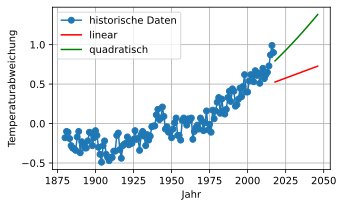

In [15]:
t_ = arange(2018, 2047)
n_ = len(t_)

# linear:
A_ = column_stack( (ones((n_,1)),t_) )
y_prog_linear = A_ @ x_linear

# quadratisch:
A_ = column_stack( (ones((n_,1)),t_,t_**2) )
y_prog_quadr = A_ @ x_quadr

figure(figsize=(5,3))
plot(t, T, 'o-', label='historische Daten')
plot(t_, y_prog_linear, '-r', label='linear')
plot(t_, y_prog_quadr , '-g', label='quadratisch')
xlabel('Jahr')
ylabel('Temperaturabweichung')
legend(numpoints=1, loc = 'best')
grid(True)

## Kurztestfragen

1. Formulieren Sie das lineare Gleichungssystem $Ax=b$ für den Fit einer quadratischen Funktion durch 10 Datenpunkte.
2. Warum hat eine Regression genau eine Lösung? Hinweis: Argumentieren Sie mit der Geometrie der Regression.
3. Formulieren Sie das lineare Gleichungssystem $Ax=b$ für den Fit einer Geraden durch 10 Datenpunkte.
4. Beschreiben Sie die Rechenschritte zum Fit einer Parabel durch 10 Datenpunkte.
5. Erläutern und skizzieren Sie die Vorgehensweise zum Fitten einer Geraden durch eine Datenwolke mittels Regression.
6. Mittels Regression sollen die Koeffizienten eines Polynoms 2. Grades berechnet werden, das die Datenpunkte $\left(\begin{array}{c}
    1  \\
    1  \\
\end{array}\right)$, $\left(\begin{array}{c}
    2  \\
    4  \\
\end{array}\right)$, $\left(\begin{array}{c}
    3  \\
    12  \\
\end{array}\right)$ und $\left(\begin{array}{c}
    4  \\
    22  \\
\end{array}\right)$ möglichst genau annähert. Wie lauten die Matrix $A$ und die Vektoren $x$ und $b$ des Minimierungsproblems gemäß min. $||Ax-b||$? Die Koeffizienten selbst müssen nicht berechnet werden. 
7. Die Datenpunkte aus Aufgabe 6) sollen mit einer Exponentialfunktion der Form $y=c\cdot e^{at}$ angenähert werden. Transformieren Sie die Funktion und formulieren Sie anschließend erneut die Matrix $A$ und die Vektoren $x$ und $b$ des Minimierungsproblems min. $||Ax-b||$.
8. Berechnen Sie Eigenwerte und Eigenvektoren der Matrix $\left(\begin{array}{c c}
    3 & 0.25 \\
    1 & 3 \\
\end{array}\right)$.

## Programmierprojekte

### Globale Erwärmung

Laden Sie die Datei `Global_Temperatures.csv`in Python mit dem Befehl:
```python
D = genfromtxt('Global_Temperatures.csv', delimiter=';')
```
Die [Werte](http://data.giss.nasa.gov/gistemp/graphs_v3/Fig.A2.txt) stammen von der NASA-Homepage [GISS Surface Temperature Analysis](http://data.giss.nasa.gov/gistemp/graphs_v3/). Sie repräsentieren jährliche Mittel der Abweichungen der Oberflächentemperaturen vom Mittel der Jahre 1951-1980. Die erste Spalte enthält die Jahre, die zweite die jährlichen Mittelwerte, die dritte die 5-jährlichen Mittelwerte.

1. Fitten Sie mittels der Methode der kleinsten Fehlerquadrate (Reggression) mindestens zwei sinnvolle Funktionen (keine Geraden!) durch die jährlichen Mittelwerte. Stellen Sie Ihre Ergebnisse auch grafisch dar.
2. Benutzen Sie Ihre mindestens zwei Modelle, um die jährliche mittlere Temperaturabweichung für die nächsten 30 Jahre vorherzusagen. Stellen Sie Ihre Ergebnisse auch grafisch dar.

*Abgabe:* Hochladen eines Ipython-Notebook als ipynb-Datein und aller evtl. zusätzlichen (Daten-)Files in ILIAS.

**Lösung:**

In [16]:
D = genfromtxt('daten/Global_Temperatures.csv', delimiter=';')
t = D[:,0]
T = D[:,1]
n = len(t)

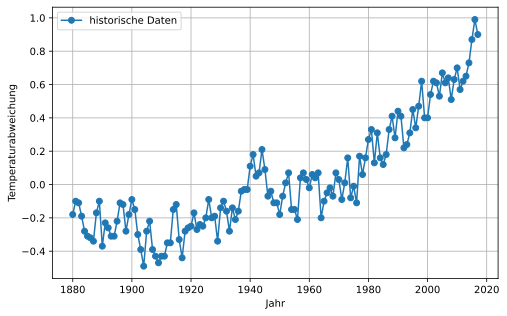

In [17]:
figure(figsize=(8,5))
plot(t, T, 'o-', label='historische Daten')
xlabel('Jahr')
ylabel('Temperaturabweichung')
legend(numpoints=1, loc='best')
grid(True)

Quadratischer Fit via Least-Squares und Polyfit:

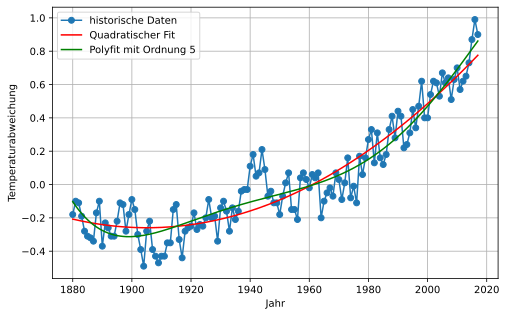

In [18]:
A = column_stack( (ones((n,1)), 
                   t, t**2))
x = lstsq(A,T,rcond=None)[0]
y_fit = dot(A, x)

ordnung = 5
y_polyfit = polyval(polyfit(t, T, ordnung), t)

figure(figsize=(8, 5))
plot(t, T, 'o-', label='historische Daten')
plot(t, y_fit, '-r', label='Quadratischer Fit')
plot(t, y_polyfit, '-g', label='Polyfit mit Ordnung {:d}'.format(ordnung))
xlabel('Jahr')
ylabel('Temperaturabweichung')
legend(loc='best', numpoints=1)
grid(True)

Prognosen:

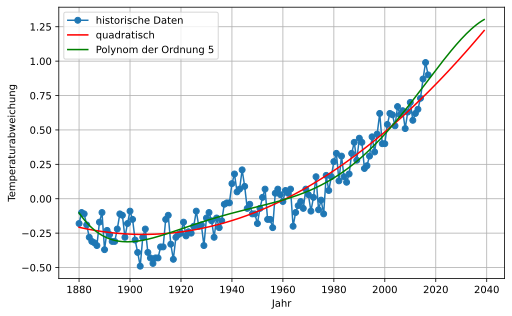

In [19]:
t_ = concatenate((t, arange(2010, 2040)))
n_ = len(t_)
A_ = column_stack( (ones((n_,1)), 
                    t_, t_**2))
y_forecast = A_ @ x
y_forecast_polyfit = polyval(polyfit(t, T, ordnung), t_)

figure(figsize=(8, 5))
plot(t, T, 'o-', label='historische Daten')
plot(t_, y_forecast, '-r', label='quadratisch')
plot(t_, y_forecast_polyfit, '-g', label='Polynom der Ordnung {:d}'.format(ordnung))
xlabel('Jahr')
ylabel('Temperaturabweichung')
legend(numpoints=1, loc = 'best')
grid(True)

### Datenfit mit Regression und LP

Gegeben sind die Messdaten $t = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]$ und 
$y = [22.04, 23.90, 22.41, 20.36, 16.82, 11.16, 4.57, 25.56, -13.78, -25.02]$.
Beim Fit einer Parabel durch die Daten mittels Regression wird die Summe der Fehlerquadrate $\lVert Ax - b \rVert ^2 = \sum_{i=1}^n (\hat{y}_i - y_i)^2$ minimiert.
Wir wollen in einem zusätzlichen Fit die Summe der Fehlerbeträge $\lvert Ax - b \rvert = \sum_{i=1}^n \lvert \hat{y}_i - y_i \rvert$ minimieren. Dies erreichen wir mit Hilfe der LP-Formulierung

$$\begin{align}
\text{min.}  & \sum_{i=1}^n u_i  \\
\text{s. t.} & -u_i \leq (Ax - b)_i \leq u_i,
\end{align}$$

wobei mit $(Ax - b)_i$ die $i$-te Zeile von $Ax - b$ gemeint ist.

*Aufgaben:* 

1. Plotten Sie die Messdaten und fitten Sie sie mittels Regression quadratisch. Ergänzen Sie Ihren Plot um die gefitteten Werte.
2. Erläutern Sie, warum die LP-Formulierung die Summe der Fehlerbeträge minimiert.
3. Lösen Sie das LP unter Python mit dem Solver `linprog`, und vergleichen Sie die Messdaten mit den beiden Fits.

*Abgabe:* Hochladen eines Ipython-Notebook als ipynb-Datei in ILIAS.`

**Lösung:**

*Quelle:* Course Notes EE236A - Linear Programming (Fall Quarter 2013-14) by L. Vandenberghe, UCLA: [Piecewise-linear optimization](http://www.seas.ucla.edu/~vandenbe/ee236a/lectures/pwl.pdf), S. 9f.

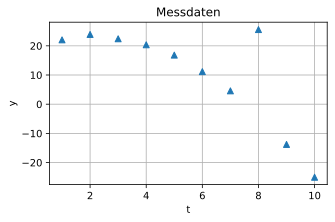

In [20]:
t = array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = array([22.04, 23.90, 22.41, 20.36, 16.82, 11.16, 4.57, 25.56, -13.78, -25.02])

figure(figsize=(5, 3))
plot(t, y, '^', label='Messdaten')
title('Messdaten')
xlabel('t')
ylabel('y')
grid(True)

In [21]:
n = len(t)
A = stack((ones(n), t, t**2), axis=1)
b = y.reshape(n, 1)

x_hat_1 = lstsq(A, b, rcond=None)[0]
print(x_hat_1)

[[15.59466667]
 [ 5.28860606]
 [-0.88      ]]


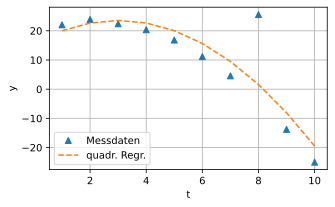

In [22]:
y_hat_1 = A@x_hat_1

figure(figsize=(5, 3))
plot(t, y      , '^' , label='Messdaten')
plot(t, y_hat_1, '--', label='quadr. Regr.')
xlabel('t')
ylabel('y')
legend(loc='best')
grid(True)

In [23]:
c = concatenate((zeros(3), ones_like(t)))

I = eye(n)
A_ub = vstack( (hstack(( A, -I)),
                hstack((-A, -I)))
             )
b_ub = concatenate((y, -y))

bounds = 3*[(None,None)] + n*[(0,None)]

res = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds)
print("Resultate:\n", res)

Resultate:
      con: array([], dtype=float64)
     fun: 30.906666702210522
 message: 'Optimization terminated successfully.'
     nit: 8
   slack: array([ 6.22227034e-08,  1.75301703e+00,  6.73831728e-08,  5.76215571e-02,
        3.29209123e-01,  3.85191008e-08,  2.93347924e-08,  5.85011130e+01,
       -2.38952342e-08,  2.19744223e-08, -5.55080177e-08, -5.09333233e-08,
        8.77758249e-02, -4.59942306e-08, -3.98604918e-08,  5.33013117e-01,
        1.49045151e-01, -5.09340232e-08,  4.02538587e-01,  7.87929224e-08])
  status: 0
 success: True
       x: array([ 1.95034133e+01,  3.31313417e+00, -7.76547550e-01,  3.35734346e-09,
        8.76508489e-01,  4.38879461e-02,  2.88107556e-02,  1.64604541e-01,
        2.66506578e-01,  7.45225902e-02,  2.92505565e+01,  2.01269281e-01,
        5.03836719e-08])


[19.50341332  3.31313417 -0.77654755]


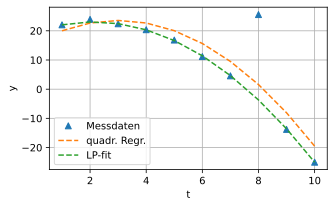

In [24]:
x_hat_2 = res.x[:3]
print(x_hat_2)

y_hat_2 = A@x_hat_2

figure(figsize=(5, 3))
plot(t, y      , '^' , label='Messdaten')
plot(t, y_hat_1, '--', label='quadr. Regr.')
plot(t, y_hat_2, '--', label='LP-fit')
xlabel('t')
ylabel('y')
legend(loc='best')
grid(True)

Man sieht, dass der LP-Fit insensitiver gegenüber dem Ausreisser $(t_8,y_8)$ ist. Das liegt daran, dass bei der Methode der kleinsten Quadrate ein großer Fehler quadratisch, also viel stärker bestraft wird. 

### Prognose von Krebs mittels Regression

Installieren Sie das Python-Paket [scikit-learn](https://scikit-learn.org) mit folgendem Befehl in einem System-Terminal oder dem Anaconda Command Prompt (=Anaconda-Kommandozeile):
```
conda install scikit-learn
```
Anschließend können Sie mit 
```python
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X = cancer.data
b = cancer.target
```
das [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) laden. 
Es enthält Daten von 569 Patientinnen. Die 30 Spalten der Matrix $X$ enthalten die Werte von 30 Features, die Aufschluß über die Gut- oder Bösartigkeit des Krebs jeder Patientin (=Zeile) geben können. Die Einträge des Vektors $b$ sind 0 für Patientinnen mit bösartigem Krebs und 1 für Patientinnen mit gutartigem Krebs.

1. Erweitern Sie die Matrix $X$ um eine Spalte mit Einsen zu einer Matrix $A$.
2. Verwenden Sie eine lineare Regression $Ax\sim b$, um die Gut- bzw. Bösartigkeit des Krebs aller Patientinnen zu fitten. Die gefitteten Werte werden nicht genau 0 oder 1 sein. Ändern Sie diese nachvollziehbar und begründet auf 0 oder 1 nach der Regression ab. Stellen Sie das Ergebnis grafisch dar.
3. Bestimmen Sie den [Coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination), deutsch: Bestimmtheitsmaß, des Fits mittels der Formel 

   $$1 - \frac{\sum_i (y_i - \hat{y}_i)^2)}{\sum_i (y_i - \bar{y})^2 },$$
   
   mit
    
    - $y_i$ dem $i$-ten zu fittenden/prognostizierenden Wert
    - $\hat{y}_i$ dem $i$-ten gefitteten/prognostizierten Wert
    - $\bar{y}$ dem Mittelwert der zu fittenden/prognostizierenden Werte

4. In der Praxis wird aus einem Trainingsdatensatz $A_{\text{train}}$ und $b_{\text{train}}$, der nur einen Teil der Patientinnendaten enthält, ein Modell $A_{\text{train}}x\sim b_{\text{train}}$ gelernt. Dieses Modell wird verwendet, um aus den restlichen Daten $A_{\text{test}}$ Prognosen (0 oder 1 pro Patientin) von $b_{\text{test}}$ zu erstellen, die mit den echten Werten $b_{\text{test}}$ verglichen werden. Wieso tut man das? Führen Sie dies für 100 zufällige 75 % zu 25 % Aufteilungen in Trainings- und Testdaten durch, und bestimmen Sie jeweils das Bestimmtheitsmaß der Prognosen von $b_{\text{test}}$. Erstellen Sie ein Histogramm der 100 Bestimmtheitsmaße.

*Hinweis:* Verwenden Sie die Funktion `random.shuffle()`.

*Abgabe:* Hochladen eines IPython-Notebooks als ipynb-Datei in ILIAS.

**Lösung:**

In [25]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X = cancer.data
b = cancer.target

In [26]:
n = len(b)
col_of_ones = ones((n,1))
A = hstack((col_of_ones, X))

x_hat = lstsq(A, b, rcond=None)[0]
b_hat_raw = A@x_hat

In [27]:
b_hat = b_hat_raw.copy()
for k in range(n):
    if b_hat[k] <= 0.50:
        b_hat[k] = 0
    else:
        b_hat[k] = 1

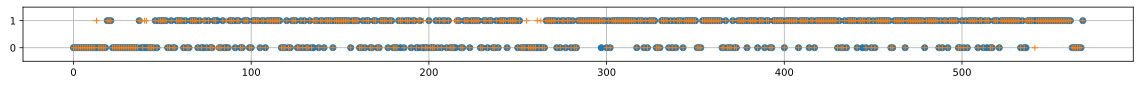

In [28]:
figure(figsize=(20,1))
plot(b, 'o')
plot(b_hat, '+')
ylim(-0.5, 1.5)
grid(True)

In [29]:
# coefficient of determination, Bestimmtheitsmaß
SS_res = sum((b - b_hat)**2)
SS_tot = sum((b - mean(b))**2)

CD = 1 - SS_res/SS_tot
print("coefficient of determination:", CD)

# for comparison: accuray (=the fraction of correctly classified samples)
accuray = sum(b_hat == b)/n
print("accuracy:", accuray)

coefficient of determination: 0.8496379683949051
accuracy: 0.9648506151142355


In [30]:
ind_all = arange(n)          # inidces of all data 
ind_75  = int(floor(n*0.75)) # index of 75-25 split

CDs = []

for s in range(100):
    print(".", end="")
    random.shuffle(ind_all)
    ind_train = ind_all[:ind_75]
    ind_test  = ind_all[ind_75:]
    
    A_train = A[ind_train, :]
    b_train = b[ind_train]
    A_test  = A[ind_test, :]
    b_test  = b[ind_test]
    
    x_hat = lstsq(A_train, b_train, rcond=None)[0]
    b_hat_raw = A_test@x_hat
    b_hat = b_hat_raw.copy()
    for k in range(len(b_hat)):
        if b_hat[k] <= 0.50:
            b_hat[k] = 0
        else:
            b_hat[k] = 1
    SS_res = sum((b_test - b_hat)**2)
    SS_tot = sum((b_test - mean(b_test))**2)
    CD = 1 - SS_res/SS_tot
    CDs.append(CD)

....................................................................................................

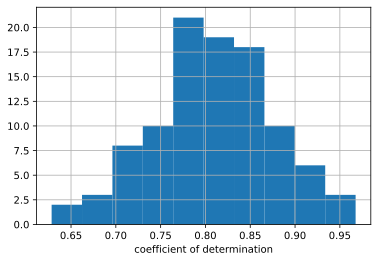

In [31]:
hist(CDs)
xlabel('coefficient of determination')
grid(True)

### Einfache Zeitreihenanalyse

Wir untersuchen die folgenden US-Verbrauchsdaten von der Data Science Website [Kaggle](https://www.kaggle.com/): estimated energy consumption in Megawatts (MW) of the [PJM](https://en.wikipedia.org/wiki/PJM_Interconnection) West Region, siehe `PJMW_hourly.csv`.

1. Im Code unten laden und vorverarbeiten wir die Rohdaten mit Hilfe des Python-Pakets [Pandas](https://pandas.pydata.org/), das in Ihrer Python-Umgebung bereits installiert sein sollte. Versuchen Sie alle Code-Blöcke zu verstehen, insbesondere die Dummyvariablen. Kontaktieren Sie bei Bedarf die (Online-)Hilfe zu den Befehlen oder Elias Eder im Rahmen des Aufbaukurses.

2. Erstellen Sie folgende drei Regressionsmodelle:

    - PJMW_MW erklärt durch Intercept (Offest, Spalte mit Einsern) und die Tagesstunden-Dummies
    - PJMW_MW erklärt durch Intercept, die Tagesstunden- und Wochentags-Dummies
    - PJMW_MW erklärt durch Intercept, die Tagesstunden-, Wochentags- und Monats-Dummies

   Interpretieren Sie die Regressionsmodelle, und bestimmen Sie von jedem den [Coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination), deutsch: Bestimmtheitsmaß, mittels der Formel 
   
   $$1 - \frac{\sum_i (y_i - \hat{y}_i)^2)}{\sum_i (y_i - \bar{y})^2 }.$$
    
   Dabei ist 
    - $y_i$ der $i$-te zu fittende/prognostizierende Wert,
    - $\hat{y}_i$ der $i$-te gefittete/prognostizierte Wert,
    - $\bar{y}$ der Mittelwert der zu fittenden/prognostizierenden Werte.

    Stellen Sie den Fit/Prognose und die wahren Werte auf geeignete Weise grafisch dar.

3. Fragen zum Bestimmtheitsmaß: Was besagt das Bestimmtheitsmaß, auch $R^2$-Wert genannt? Warum ist eine $R^2$-Optimierung gleichwertig zur Regressionsrechnung?

4. Welche Ideen für ein verbessertes Regressionsmodell mittels Dummies haben Sie?

5. Erstellen Sie ein [Autoregressionsmodell](https://en.wikipedia.org/wiki/Autoregressive_model) der Ordnung $k=5$ aus den PJMW_MW Daten. Als Regressoren dienen dabei neben dem Intercept die jeweils letzten $k$ Werte der Zielgröße PJMW_MW. Bestimmen Sie das Bestimmtheitsmaß dieser Regression und interpretieren Sie das Ergebnis im Vergleich zu den Regressionen mittels Dummies.

*Abgabe:* Hochladen eines IPython-Notebooks als ipynb-Datei in ILIAS.

In [34]:
%pylab inline
import pandas as pd
import datetime as dt

Populating the interactive namespace from numpy and matplotlib


In [35]:
my_date_parser = lambda x: dt.datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
my_df = pd.read_csv('daten/PJMW_hourly.csv', 
                    parse_dates=['Datetime'],
                    date_parser=my_date_parser, index_col=0)
my_df.sort_index(inplace=True) # sort by date
my_df = my_df.loc['2017']      # select year 2017

In [36]:
# show head of data:
my_df.head()

PJMW_MW
Datetime                    
2017-01-01 00:00:00   5231.0
2017-01-01 01:00:00   5007.0
2017-01-01 02:00:00   4882.0
2017-01-01 03:00:00   4761.0
2017-01-01 04:00:00   4719.0

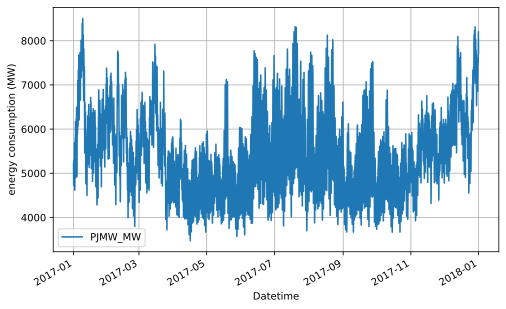

In [37]:
# plot all ata:
my_df.plot(figsize=(8,5), grid=True)
ylabel('energy consumption (MW)');

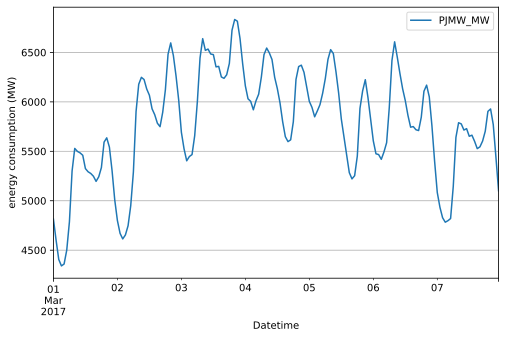

In [38]:
# plot some days:
my_df.loc['2017-03-01':'2017-03-07'].plot(figsize=(8,5), grid=True)
ylabel('energy consumption (MW)');

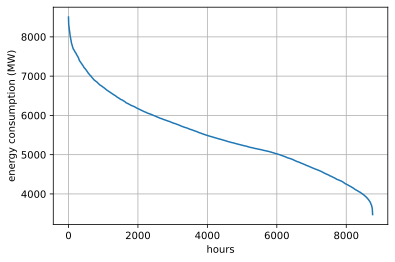

In [39]:
# Plot der Dauerlinie:
plot(my_df.sort_values('PJMW_MW', ascending=False).values)
ylabel('energy consumption (MW)')
xlabel('hours')
grid(True)

In [40]:
# augment data frame with date and time information:
my_df['hour']      = my_df.index.hour      # 0,..., 23
my_df['dayofweek'] = my_df.index.dayofweek # Monday=0, Sunday=6
my_df['month']     = my_df.index.month     # January=1, December=12.
my_df.head()

PJMW_MW  hour  dayofweek  month
Datetime                                            
2017-01-01 00:00:00   5231.0     0          6      1
2017-01-01 01:00:00   5007.0     1          6      1
2017-01-01 02:00:00   4882.0     2          6      1
2017-01-01 03:00:00   4761.0     3          6      1
2017-01-01 04:00:00   4719.0     4          6      1

In [41]:
# make dummy/indicator variables:
my_df = pd.get_dummies(my_df, columns=['hour', 'dayofweek','month'])
my_df.head()

PJMW_MW  hour_0  hour_1  hour_2  hour_3  hour_4  hour_5  \
Datetime                                                                       
2017-01-01 00:00:00   5231.0       1       0       0       0       0       0   
2017-01-01 01:00:00   5007.0       0       1       0       0       0       0   
2017-01-01 02:00:00   4882.0       0       0       1       0       0       0   
2017-01-01 03:00:00   4761.0       0       0       0       1       0       0   
2017-01-01 04:00:00   4719.0       0       0       0       0       1       0   

                     hour_6  hour_7  hour_8  ...  month_3  month_4  month_5  \
Datetime                                     ...                              
2017-01-01 00:00:00       0       0       0  ...        0        0        0   
2017-01-01 01:00:00       0       0       0  ...        0        0        0   
2017-01-01 02:00:00       0       0       0  ...        0        0        0   
2017-01-01 03:00:00       0       0       0  ...        0        0        0   
2017-01-01 04:00:00       0       0       0  ...        0        0        0   

                     month_6  month_7  month_8  month_9  month_10  month_11  \
Datetime                                                                      
2017-01-01 00:00:00        0        0        0        0         0         0   
2017-01-01 01:00:00        0        0        0        0         0         0   
2017-01-01 02:00:00        0        0        0        0         0         0   
2017-01-01 03:00:00        0        0        0        0         0         0   
2017-01-01 04:00:00        0        0        0        0         0         0   

                     month_12  
Datetime                       
2017-01-01 00:00:00         0  
2017-01-01 01:00:00         0  
2017-01-01 02:00:00         0  
2017-01-01 03:00:00         0  
2017-01-01 04:00:00         0  

[5 rows x 44 columns]

In [42]:
# view on hour columns only:
my_df.loc[:,'hour_0':'hour_23']

hour_0  hour_1  hour_2  hour_3  hour_4  hour_5  hour_6  \
Datetime                                                                      
2017-01-01 00:00:00       1       0       0       0       0       0       0   
2017-01-01 01:00:00       0       1       0       0       0       0       0   
2017-01-01 02:00:00       0       0       1       0       0       0       0   
2017-01-01 03:00:00       0       0       0       1       0       0       0   
2017-01-01 04:00:00       0       0       0       0       1       0       0   
...                     ...     ...     ...     ...     ...     ...     ...   
2017-12-31 19:00:00       0       0       0       0       0       0       0   
2017-12-31 20:00:00       0       0       0       0       0       0       0   
2017-12-31 21:00:00       0       0       0       0       0       0       0   
2017-12-31 22:00:00       0       0       0       0       0       0       0   
2017-12-31 23:00:00       0       0       0       0       0       0       0   

                     hour_7  hour_8  hour_9  ...  hour_14  hour_15  hour_16  \
Datetime                                     ...                              
2017-01-01 00:00:00       0       0       0  ...        0        0        0   
2017-01-01 01:00:00       0       0       0  ...        0        0        0   
2017-01-01 02:00:00       0       0       0  ...        0        0        0   
2017-01-01 03:00:00       0       0       0  ...        0        0        0   
2017-01-01 04:00:00       0       0       0  ...        0        0        0   
...                     ...     ...     ...  ...      ...      ...      ...   
2017-12-31 19:00:00       0       0       0  ...        0        0        0   
2017-12-31 20:00:00       0       0       0  ...        0        0        0   
2017-12-31 21:00:00       0       0       0  ...        0        0        0   
2017-12-31 22:00:00       0       0       0  ...        0        0        0   
2017-12-31 23:00:00       0       0       0  ...        0        0        0   

                     hour_17  hour_18  hour_19  hour_20  hour_21  hour_22  \
Datetime                                                                    
2017-01-01 00:00:00        0        0        0        0        0        0   
2017-01-01 01:00:00        0        0        0        0        0        0   
2017-01-01 02:00:00        0        0        0        0        0        0   
2017-01-01 03:00:00        0        0        0        0        0        0   
2017-01-01 04:00:00        0        0        0        0        0        0   
...                      ...      ...      ...      ...      ...      ...   
2017-12-31 19:00:00        0        0        1        0        0        0   
2017-12-31 20:00:00        0        0        0        1        0        0   
2017-12-31 21:00:00        0        0        0        0        1        0   
2017-12-31 22:00:00        0        0        0        0        0        1   
2017-12-31 23:00:00        0        0        0        0        0        0   

                     hour_23  
Datetime                      
2017-01-01 00:00:00        0  
2017-01-01 01:00:00        0  
2017-01-01 02:00:00        0  
2017-01-01 03:00:00        0  
2017-01-01 04:00:00        0  
...                      ...  
2017-12-31 19:00:00        0  
2017-12-31 20:00:00        0  
2017-12-31 21:00:00        0  
2017-12-31 22:00:00        0  
2017-12-31 23:00:00        1  

[8760 rows x 24 columns]

In [43]:
my_df.columns

Index(['PJMW_MW', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'dayofweek_0',
       'dayofweek_1', 'dayofweek_2', 'dayofweek_3', 'dayofweek_4',
       'dayofweek_5', 'dayofweek_6', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12'],
      dtype='object')

In [44]:
# column 'PJMW_MW' as nx1 array:
my_df['PJMW_MW'].values

array([5231., 5007., 4882., ..., 8012., 7864., 7710.])

In [45]:
# other columns as array:
my_df.loc[:,'hour_0':'month_12'].values

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

**Lösung:**

In [46]:
# Regression mit Dummies:

In [47]:
b = my_df.loc[:,'PJMW_MW'].values

# A = my_df.loc[:,'hour_0':'hour_23'].values
# A = my_df.loc[:,'hour_0':'dayofweek_6'].values
A = my_df.loc[:,'hour_0':'month_12'].values

n = len(b)
col_of_ones = ones((n,1))
A = hstack((col_of_ones, A))

In [48]:
x_hat = lstsq(A, b, rcond=None)[0]
b_hat = A@x_hat

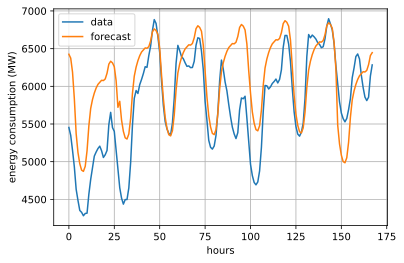

In [49]:
offset = 500
plot(b    [offset:offset + 24*7], label='data')
plot(b_hat[offset:offset + 24*7], label='forecast')
xlabel('hours')
ylabel('energy consumption (MW)')
legend()
grid(True)

In [50]:
# coefficient of determination, Bestimmtheitsmaß:
SS_res = sum((b - b_hat)**2)
SS_tot = sum((b - mean(b))**2)

CD = 1 - SS_res/SS_tot
print("coefficient of determination: {:.3f}".format(CD))

coefficient of determination: 0.571


In [51]:
# Autoregression mit k Zeitschritten:

In [52]:
k = 5
b_ = b[k:]

# checks
# b_[:3]
# b[: k + 3]

In [53]:
B = zeros((n - k, k))
for i in range(k):
    B[:,k - i -1] = b[i: n - (k - i)]
B

array([[4719., 4761., 4882., 5007., 5231.],
       [4721., 4719., 4761., 4882., 5007.],
       [4784., 4721., 4719., 4761., 4882.],
       ...,
       [8053., 8205., 8145., 7655., 7503.],
       [8012., 8053., 8205., 8145., 7655.],
       [7864., 8012., 8053., 8205., 8145.]])

In [54]:
col_of_ones = ones((n - k, 1))
A_ = hstack((col_of_ones, B))

In [55]:
x_hat = lstsq(A_, b_, rcond=None)[0]
b_hat = A_@x_hat

In [56]:
# coefficient of determination, Bestimmtheitsmaß:
SS_res = sum((b_ - b_hat)**2)
SS_tot = sum((b_ - mean(b_))**2)

CD = 1 - SS_res/SS_tot
print("coefficient of determination: {:.3f}".format(CD))

coefficient of determination: 0.984


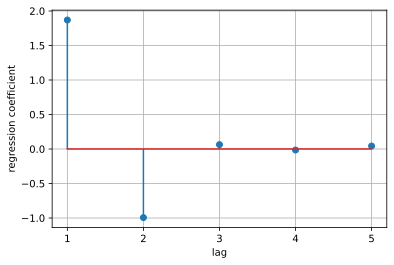

In [57]:
stem(range(1, k+1), x_hat[1:], use_line_collection=True)
xticks(range(1, k+1))
xlabel('lag')
ylabel('regression coefficient')
grid(True)

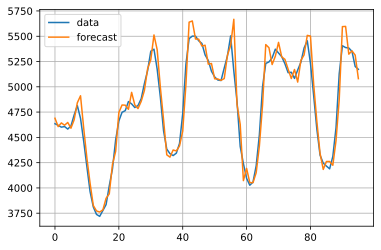

In [58]:
offset = 2000
plot(b_   [offset:offset + 24*4], label='data')
plot(b_hat[offset:offset + 24*4], label='forecast')
legend()
grid(True)